#  Scale-Invariant Feature Transform (SIFT) 

The scale-invariant feature transform (SIFT) is a computer vision algorithm to detect, describe, and match local features in images. Applications include object recognition, robotic mapping and navigation, etc.

SIFT keypoints of objects are first extracted from a set of reference images and stored in a database. An object is recognized in a new image by individually comparing each feature from the new image to this database and finding candidate matching features based on Euclidean distance of their feature vectors. From the full set of matches, subsets of keypoints that agree on the object and its location, scale, and orientation in the new image are identified to filter out good matches. The determination of consistent clusters is performed rapidly by using an efficient hash table implementation of the generalised Hough transform. Each cluster of 3 or more features that agree on an object and its pose is then subject to further detailed model verification and subsequently outliers are discarded. Finally the probability that a particular set of features indicates the presence of an object is computed, given the accuracy of fit and number of probable false matches. Object matches that pass all these tests can be identified as correct with high confidence.
_source: https://en.wikipedia.org/wiki/Scale-invariant_feature_transform_

This algorithm is invariant to 
1. Scale (becasue we use intensity gradient)
2. Rotation 
3. Translation (background)
4.  (becasue we use intensity gradient)

and partially invariant to 
1. Illumination changes such as image brightness and contrast (because we use normalize feature vectors)
2. Camera viewpoint
3. Occlusion (when the object is party blocked by something else) and cluter

It is used for extracting distinctive invariant feature from images to serve reliable matching between different views of a scene or an object.

## How it works
Two main steps are required for the implementation of SIFT method. Firstly, it is necessary to extract the characteristics of an object and to calculate its descriptors. In other words, it detects the characteristics that are most likely to represent an object, to define and to discriminate it by comparing it with others (key points). Secondly, it is necessary to set up a matching procedure which is the eventual goal of the method.

<img src="https://biomedpharmajournal.org/wp-content/uploads/2020/12/Vol13No4_Rob_Sai_fig2.jpg" alt="Alternative text" width="500"/>

We will explore the main steps involved in transforming an image into a set of descriptor vectors: 

1. Scale-space extrema detection:
Using a Gaussian difference function, we initiate a search across all scales and image locations to identify potential points of interest that remain invariant to scale and orientation. In other words, candidate keypoints are obtained by locating the extrema from the Difference of Gaussian (DoG) pyramid.

2. Keypoint localization:
In order to obtain stable keypoints, three processes are applied in this step. The first process utilizes the 3rd order Taylor polynomial to accurately determine the location of keypoints. The second process focuses on eliminating keypoints with low contrast. In the final process, keypoints located on edges are eliminated using the principal curvature.

3. Orientation assignment:
At each keypoint location, one or more orientations are assigned based on local image gradient directions, as depicted here:

<img src="https://biomedpharmajournal.org/wp-content/uploads/2020/12/Vol13No4_Rob_Sai_fig3.jpg" alt="Alternative text" width="500"/>

4. Orientation assignment to points of interest:
Calculating orientation histograms according to the neighborhood is crucial to justifying the invariance of the descriptors concerning rotation.

<img src="https://biomedpharmajournal.org/wp-content/uploads/2020/12/Vol13No4_Rob_Sai_fig4.jpg" alt="Alternative text" width="500"/>

5. Calculation of the descriptors:
Generating descriptor vectors associated with each point of interest involves calculating the Keypoint descriptor at each point in the window, considering orientation and gradient magnitude. For each sub-region based on gradient magnitude, an orientation histogram representing eight cardinal directions is calculated.







## Using SIFT Library in OpenCV

### Preparation
Make sure you have OpenCV and its contrib module installed using the following commands:

`pip install opencv-python` <br/>
`pip install opencv-contrib-python`


### Import Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt

### Read and Load an Image using CV2

In [2]:
# LOAD AN IMAGE USING 'IMREAD'
img = cv2.imread("4_SIFT&RANSAC/all_souls_000002.jpg")
# DISPLAY
cv2.imshow("All Souls", img)
cv2.waitKey(0)

-1

### Visualize the key points 

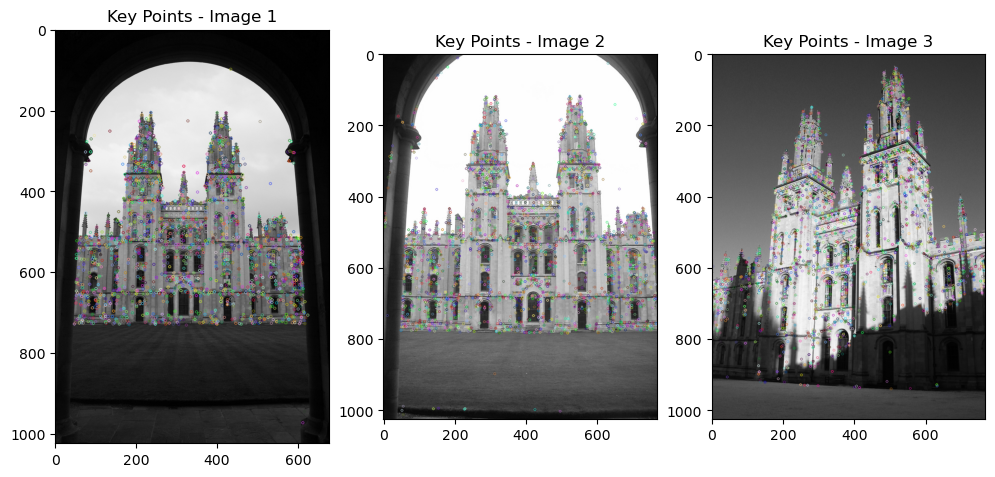

In [3]:
# Load images
img1 = cv2.imread("4_SIFT&RANSAC/all_souls_000002.jpg", 0) # 0 means read as Grayscale
img2 = cv2.imread("4_SIFT&RANSAC/all_souls_000006.jpg", 0)
img3 = cv2.imread("4_SIFT&RANSAC/all_souls_000013.jpg", 0) 

# cv2.imshow("All Souls", img1)
# cv2.waitKey(0)

# Create Sift
sift = cv2.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None) #None : No mask to specify a region of interest (ROI) where key points should be detected.
kp2, des2 = sift.detectAndCompute(img2, None)
kp3, des3 = sift.detectAndCompute(img3, None)

# Visualize key points
img1_keypoints = cv2.drawKeypoints(img1, kp1, None) # None: create a new image, draw keypoints on this new image, not on the original img.
img2_keypoints = cv2.drawKeypoints(img2, kp2, None)
img3_keypoints = cv2.drawKeypoints(img3, kp3, None)

# Plot Key points
plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(img1_keypoints, cmap='gray'), plt.title('Key Points - Image 1')
plt.subplot(132), plt.imshow(img2_keypoints, cmap='gray'), plt.title('Key Points - Image 2')
plt.subplot(133), plt.imshow(img3_keypoints, cmap='gray'), plt.title('Key Points - Image 3')
plt.show()

### Match the images using Brute Force Matcher

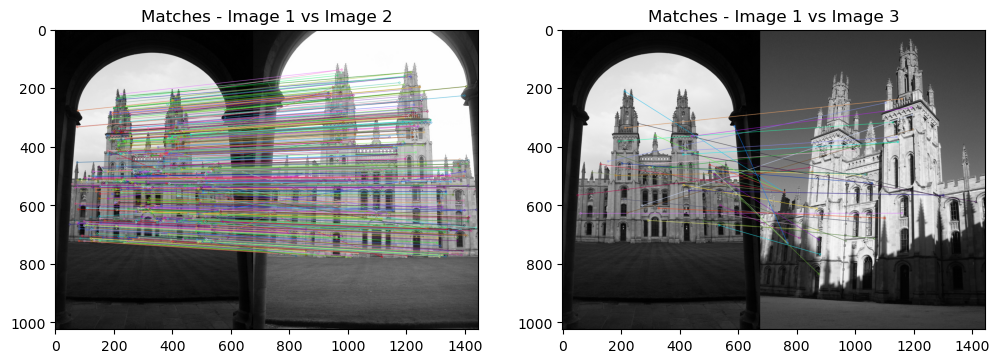

In [12]:
# Brute Force Matcher
bf = cv2.BFMatcher()

# Match descriptors
matches_12 = bf.knnMatch(des1, des2, k= 2) #K number of neighbours to consider 
matches_13 = bf.knnMatch(des1, des3, k= 2)

# Apply ratio test
good_matches_12 = []
good_matches_13 = []

for m, n in matches_12:
    if m.distance < 0.75 * n.distance: 
        good_matches_12.append(m)

for m, n in matches_13:
    if m.distance < 0.75 * n.distance:
        good_matches_13.append(m)

# Visualize matches
img_matches_12 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches_12, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches_13 = cv2.drawMatches(img1, kp1, img3, kp3, good_matches_13, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Plot maches
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img_matches_12), plt.title('Matches - Image 1 vs Image 2')
plt.subplot(122), plt.imshow(img_matches_13), plt.title('Matches - Image 1 vs Image 3')
plt.show()

### Important Observations
#### Which image pair are easy to match and why? What settings of the parameters have you used? 
Images 1 and 2 are easier to match because the angle is similar and there isn't much shadow (low illumination) in either of them.

<b>$k$ Value:</b> I used $k$ = 2 for _KnnMatch_ function because increasing it seemed to reduce the accuracy, especially for Image 1 and 3. 
Choosing a higher value for $k$ can be useful in certain scenarios. For instance, if you want to explore more potential matches or if you are working with descriptors that have a more complex distribution, increasing k can provide additional information.
However, keep in mind that with a higher value of $k$, you might also get more false positives, and it could become necessary to implement more stringent filtering (such as a stricter ratio test) to ensure the quality of the matches.

<b>Distance:</b>
Here we chose 0.75 as distance between good matches. A lower number would result in fewer matches and conversely, a higher number in more matches. 

#### How are key points extracted in SIFT? 
Key points are extracted based on the following key steps:

1. Scale-space extrema detection:
* SIFT applies a series of Gaussian blurs to the input image at different scales. This process results in creating an image pyramid, where each level corresponds to a different scale.

<img src="https://i0.wp.com/theailearner.com/wp-content/uploads/2019/08/Image_pyramid.png?w=1024&ssl=1" alt="Alternative text" width="500"/>

* At each scale level, the Difference of Gaussians (DoG) is computed by subtracting adjacent blurred images.
* Local extrema (maxima or minima) in the DoG images are detected. These extrema represent potential key points.

2. Keypoint localization:
* Once potential key points are identified, SIFT performs detailed localization to refine their positions.
* It fits a 3D quadratic function to the nearby data points in the DoG space to determine more accurate keypoint locations.

3. Orientation assignment:
* For each key point, an orientation is assigned based on the local gradient directions in the image.
* SIFT computes the gradient magnitude and direction at each pixel in the keypoint's neighborhood. The dominant orientation is determined, and the key point is assigned this orientation.

4. Key point descriptor calculation:
* A descriptor is computed for each key point to represent its appearance.
* SIFT uses histograms of gradient orientations in the key point's neighborhood to build a robust descriptor.
#### Why and how are the low contrast key points removed?
Low contrast key points may not be reliable features, as they do not stand out well from their surroundings. They might not provide distinctive information for matching or recognition. Removing low contrast keypoints helps improve the overall quality and robustness of the feature set.

_How are low contrast key points removed?_
* SIFT applies a contrast threshold during the key point localization step.
* After identifying potential key points, it checks their contrast by comparing the intensity of the pixel at the key point location with the value of the pixel at the extrema in the DoG space. If the contrast is below a certain threshold, the key point is discarded.
* The contrast threshold is a parameter that can be adjusted based on the characteristics of the images being processed.
* By removing low contrast key points, SIFT aims to focus on features that are more distinctive and less affected by variations in illumination or noise.

#### What are some applications in computer vision where SIFT and RANSAC are applied?

SIFT and RANSAC are widely used in various computer vision applications due to their robustness and versatility. Some common applications where SIFT and RANSAC are applied include:

1. Object Recognition and Matching
2. Image Stitching
3. Panorama Creation
4. 3D Reconstruction
5. Object Tracking
6. Augmented Reality (AR)
7. Robotics
8. Facial Recognition


In [ ]:
## Source: https://www.youtube.com/watch?v=6oLRdnQI_2w&ab_channel=NicolaiNielsen
# import time
# #sift
# sift = cv2.SIFT_create()

# #feature matching
# bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)


# cap = cv2.VideoCapture(0)

# while cap.isOpened():
#     # read images

#     suc, img1 = cap.read()
#     img2 = img1
#     #img1 = cv2.imread('pencil3.jpg')  
#     #img2 = cv2.imread('pencil3.jpg') 

#     start = time.time()

#     img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#     img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#     keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
#     keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#     matches = bf.match(descriptors_1,descriptors_2)
#     matches = sorted(matches, key = lambda x:x.distance)

#     end = time.time()
#     totalTime = end - start

#     fps = 1 / totalTime
#     #print("FPS: ", fps)
    

#     img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:300], img2, flags=2)
#     #plt.imshow(img3),plt.show()
#     cv2.putText(img3, f'FPS: {int(fps)}', (20,450), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,0), 2)
#     cv2.imshow('SIFT', img3)

#     if cv2.waitKey(5) & 0xFF == 27:
#         break


# cap.release()